In [12]:
import os
import scipy.io as sio
import numpy as np
import scipy.stats as ss

from sklearn.metrics import mean_squared_error as mse

%matplotlib inline
import matplotlib.pyplot as plt

In [45]:
def smape(A, F):
    return 100/len(A) * np.sum(np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [1]:
def sc(signal):
    return np.sum(abs(signal[1:] - signal[:-1]))

In [3]:
results = os.listdir('../../../results_sim/')

In [5]:
sc_all = []
for result in results:
    if 'mat' in result:
        res = sio.loadmat('../../../results_sim/' + result)
        time = res['time'][0]
        speed = res['speed'][0]
        current1_pred = res['current1_pred'][0]
        current2_pred = res['current2_pred'][0]
        current1_true = res['current1_true'][0]
        current2_true = res['current2_true'][0]
        torque_pred = res['torque_pred'][0]
        torque_true = res['torque_true'][0]
        voltage1 = res['voltage1'][0]
        voltage2 = res['voltage2'][0]
        
        for i in range(0,len(current1_true),100):
            sc_all.append(sc(current1_true[i:i+100]))
            sc_all.append(sc(current2_true[i:i+100]))
            sc_all.append(sc(torque_true[i:i+100]))

In [8]:
max(sc_all), min(sc_all)

(174.49254, 0.0)

/home/galen-post/sverma/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


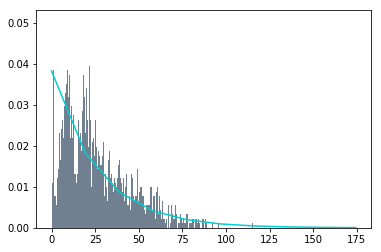

In [23]:

P = ss.expon.fit(sc_all)
rX = np.linspace(min(sc_all), max(sc_all), 10)
rP = ss.expon.pdf(rX, *P)

plt.hist(sc_all, bins=1000, normed=True, color='slategrey')

plt.plot(rX, rP, color='darkturquoise')
plt.show()
